# **Import TensorFlow and other library..

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tqdm import tqdm

In [2]:
from tensorflow.keras.utils import image_dataset_from_directory

img_height = 224
img_width = 224
batch_size = 32

train_ds = image_dataset_from_directory(
     # "F:/Towhid/new/Version1/augmented_images/",
   "../input/knknhh/Version1/preprocessed_original_images",
    label_mode='categorical',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = image_dataset_from_directory(
  #  "F:/Towhid/new/Version1/augmented_images/",
   "../input/knknhh/Version1/preprocessed_original_images",
    label_mode='categorical',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 804 files belonging to 6 classes.
Using 644 files for training.
Found 804 files belonging to 6 classes.
Using 160 files for validation.


In [3]:
class_names = train_ds.class_names
class_names

class_val=val_ds.class_names
class_val

['chickenpox', 'cowpox', 'healthy', 'measles', 'monkeypox', 'smallpox']

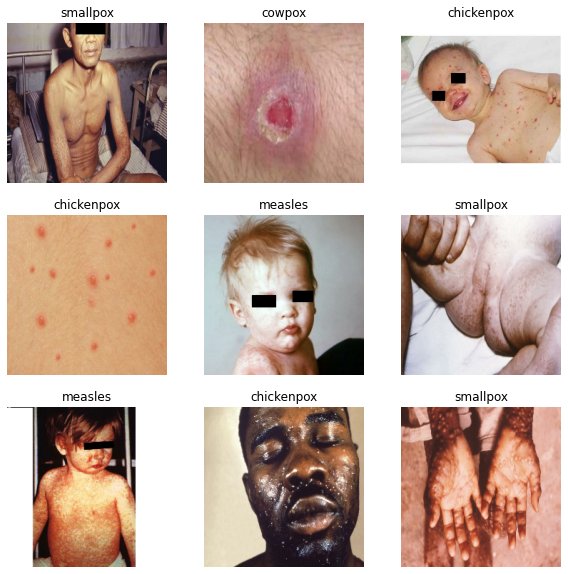

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [5]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

# Define model
model = Sequential()

# Download ResNet50
pretrained_model= ResNet50(include_top=False,
                           input_shape=(224, 224, 3), # Input shape dimension
                           pooling='avg', # AvgPool
                           classes=6, # Total output
                           weights='imagenet')

# Disable train on ResNet50
for layer in pretrained_model.layers:
    layer.trainable=False

# ResNet50 Layers
model.add(pretrained_model)
# Flatten all data
model.add(Flatten())
# Fully connected layers with 512 neurons
model.add(Dense(512, activation='relu'))
# Output layers
model.add(Dense(6, activation='softmax'))

# Give summary
model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3078      
Total params: 24,639,878
Trainable params: 1,052,166
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
# Compile model. If you want to optimize this, you can tuning learning rate and etc but its just too slowwwwwww
model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Finally train this neural net. Ten epochs seems ok to me
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
21/21 [==============================] - 63s 3s/step - loss: 1.1302 - accuracy: 0.6273 - val_loss: 0.9029 - val_accuracy: 0.7000
Epoch 2/10
21/21 [==============================] - 57s 3s/step - loss: 0.3349 - accuracy: 0.8789 - val_loss: 1.0262 - val_accuracy: 0.7375
Epoch 3/10
21/21 [==============================] - 56s 3s/step - loss: 0.1386 - accuracy: 0.9627 - val_loss: 0.8086 - val_accuracy: 0.7000
Epoch 4/10
21/21 [==============================] - 57s 3s/step - loss: 0.0615 - accuracy: 0.9907 - val_loss: 0.8744 - val_accuracy: 0.7250
Epoch 5/10
21/21 [==============================] - 57s 3s/step - loss: 0.0344 - accuracy: 0.9984 - val_loss: 0.8273 - val_accuracy: 0.7250
Epoch 6/10
21/21 [==============================] - 56s 3s/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.8193 - val_accuracy: 0.7500
Epoch 7/10
21/21 [==============================] - 57s 3s/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.8497 - val_accuracy: 0.7375
Epoch 8/10
21/21 [==

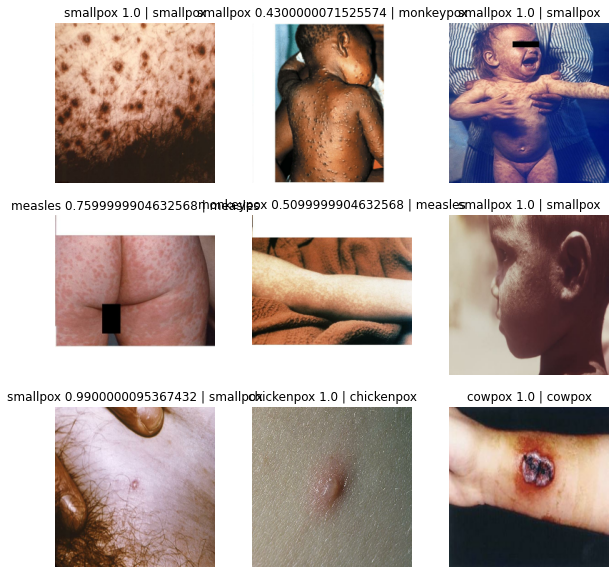

In [7]:
 # Just random testing
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    for i in range(9):
        result = model(np.expand_dims(images[i], axis=0))
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"{class_names[np.argmax(result)]} {round(np.max(result), 2)} | {class_names[np.argmax(labels[i])]}")
        plt.axis("off")

In [8]:
# Predict everything inside validation dataset
labels = []
predictions = []

for X, y in tqdm(val_ds):
    for i in range(len(X)):
        result = model(np.expand_dims(X[i], axis=0))

        predictions.append(class_names[np.argmax(result)])
        labels.append(class_names[np.argmax(y[i])])

100%|██████████| 5/5 [00:40<00:00,  8.19s/it]


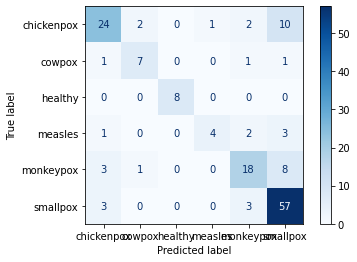

In [9]:
# Show confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(labels, predictions, cmap='Blues')
plt.show()

In [10]:
# Calculate some ML metrics on average
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', accuracy_score(labels, predictions))
print('Precision score : ', precision_score(labels, predictions, average='weighted'))
print('Recall score : ', recall_score(labels, predictions, average='weighted'))
print('F1 score : ', f1_score(labels, predictions, average='weighted'))

Accuracy score :  0.7375
Precision score :  0.7404682935735151
Recall score :  0.7375
F1 score :  0.7285169349429912


In [11]:
# Take a look more detail on each label.Maybe something unbalance
from sklearn.metrics import classification_report

print(classification_report(labels, predictions))

              precision    recall  f1-score   support

  chickenpox       0.75      0.62      0.68        39
      cowpox       0.70      0.70      0.70        10
     healthy       1.00      1.00      1.00         8
     measles       0.80      0.40      0.53        10
   monkeypox       0.69      0.60      0.64        30
    smallpox       0.72      0.90      0.80        63

    accuracy                           0.74       160
   macro avg       0.78      0.70      0.73       160
weighted avg       0.74      0.74      0.73       160

